# Part 2. Image processing

```shell
Main inputs:

cat-bw.png
cat-color.png
coin.png
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

# Uploading a colour image

In [2]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


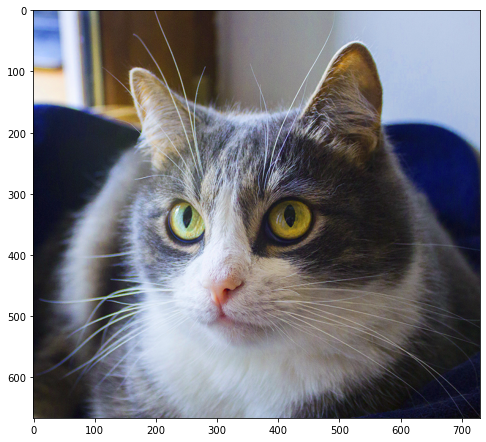

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

# Linear brightness reduction

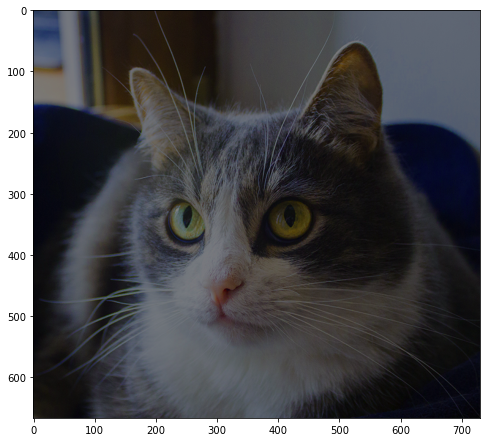

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img/2)

# Linear brightness boost

Possibility of exceeding the tolerance range

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


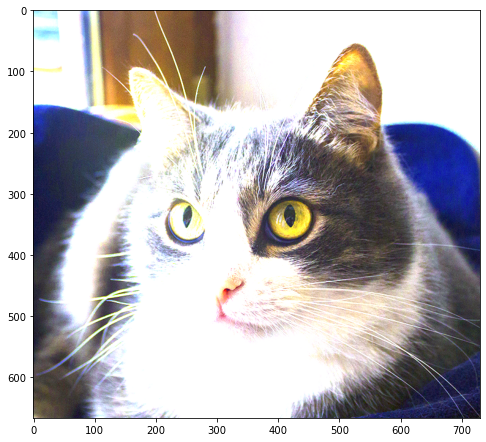

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img*2)

# Non-linear brightness reduction

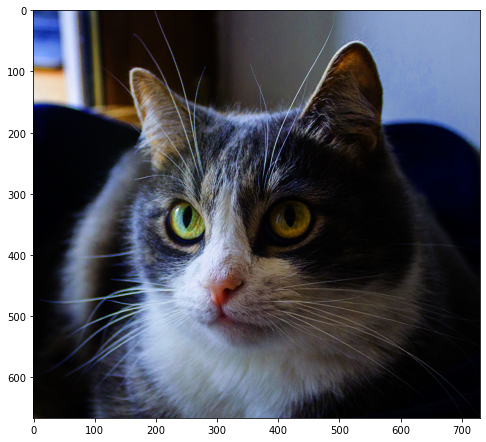

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2) # squaring

# Non-linear brightness boost

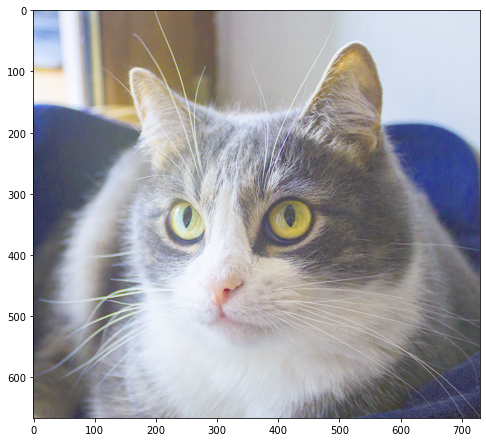

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) # sqrt

# Convert a B/W image to colour

In [9]:
# find the average of the 2nd axis
# channel 0 - height, 1 - width, 2 - colour channels
img_bw = np.mean(img, axis=2)

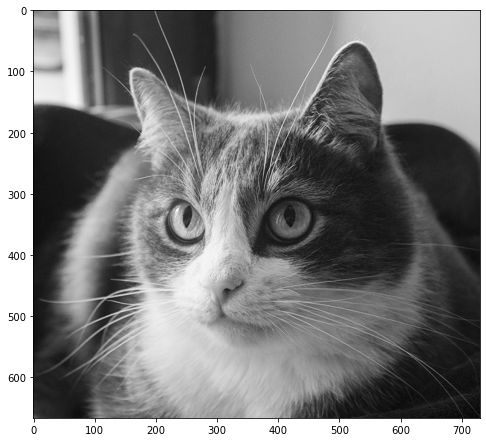

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

# HSV colour space

Hue Saturation Value
```shell
Hue -  0
Saturation -  1
Value - 2
```

In [11]:
from skimage.color import rgb2hsv, hsv2rgb

In [13]:
# move to another colour space
img_hsv = rgb2hsv(img)

In [14]:
# Hue, Saturation, Value
img_hsv[:5, :5, :]

array([[[0.61702126, 0.5136612 , 0.7176471 ],
        [0.6180555 , 0.51891893, 0.7254902 ],
        [0.6088435 , 0.5297297 , 0.7254902 ],
        [0.6088435 , 0.5240642 , 0.73333335],
        [0.61702126, 0.5136612 , 0.7176471 ]],

       [[0.6185567 , 0.53296703, 0.7137255 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6175439 , 0.5248619 , 0.70980394]],

       [[0.6185567 , 0.5388889 , 0.7058824 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.51336896, 0.73333335],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6088435 , 0.5355191 , 0.7176471 ]],

       [[0.6111111 , 0.5238095 , 0.7411765 ],
        [0.6116667 , 0.52910054, 0.7411765 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.6088435 , 0.5212766 , 0.7372549 ]],

       [[0.6094771 , 0.5396825 , 0.7411765 ],
        [0.60891086, 0.534

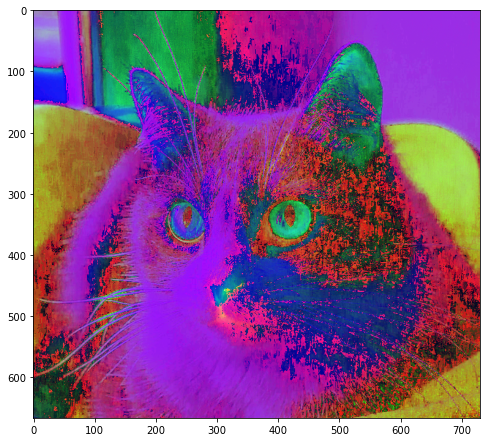

In [15]:
# imshow will treat the values as RGB
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

However, we can do different manipulations in this space.

# Linear saturation reduction

In [16]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 2
img_new = hsv2rgb(img_hsv_new)

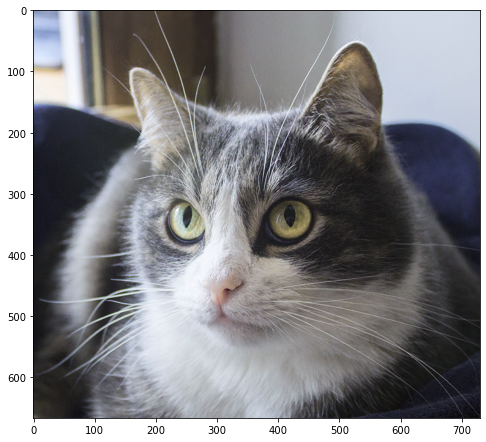

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

# Linear saturation boost

Possibility of exceeding the tolerance range

In [18]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 2
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


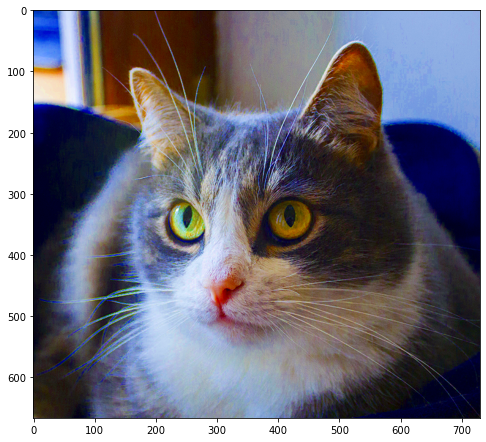

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

# Changing the hue

In [20]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 2
img_new = hsv2rgb(img_hsv_new)

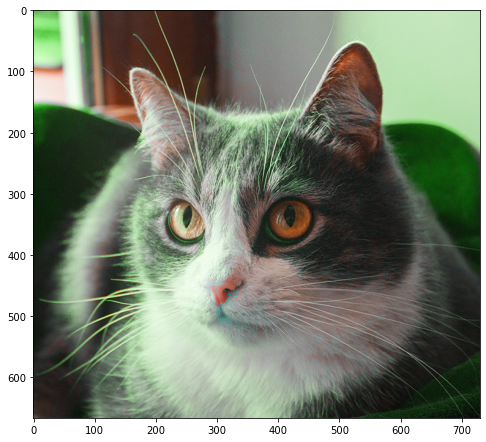

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

# Threshold binarisation

Simple implementation of the segmentation task

In [22]:
img = imageio.imread('coin.png')
img = img.astype(np.float32) / 255.

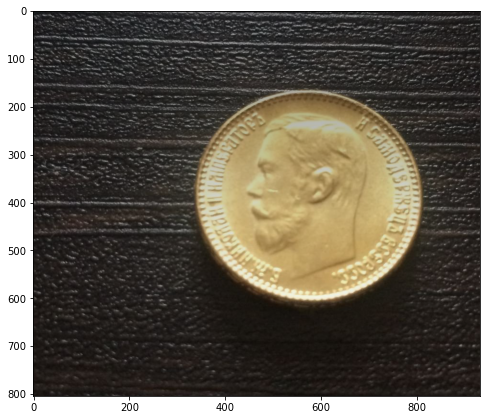

In [23]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [25]:
threshold = 0.45 # binarization threshold
# move to grayscale
img_bw = np.mean(img, axis=2)
# numpy will output a 2-dimensional matrix where each element has a value of True or False
# depending on whether the initial value was higher or lower than the threshold
# then True/False convert to int8 -> zeros and ones
img_bin = (img_bw > threshold).astype(np.uint8)

In [26]:
img_bin[:5, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

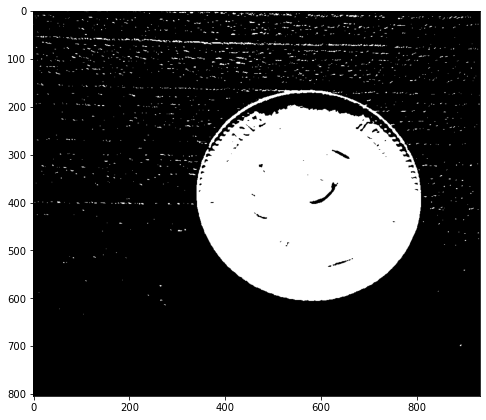

In [27]:
plt.figure(figsize=(8, 8))
# must be multiplied by 255, otherwise imshow will think that 0 and 1 are two very dark colours
plt.imshow(img_bin*255, cmap='gray')